#Gri Tonlamalı Görüntü Yoğunluğu Dönüşümü

Giriş olarak 8-bit gri tonlamalı bir görüntü kullanılmıştır.

Görüntüdeki her bir piksel yoğunluk değeri
$r \in [0,255]$ olacak şekilde ele alınmıştır.

Piksel değerlerine aşağıda verilen yoğunluk dönüşüm fonksiyonu uygulanmıştır:

$$
s = 16\sqrt{r}
$$

Karekök işleminin doğru biçimde uygulanabilmesi için görüntü geçici olarak
**float** veri tipine dönüştürülmüştür.

Elde edilen sonuçlar $[0,255]$ aralığında sınırlandırılmış ve tekrar
**uint8** formatına çevrilmiştir.

İşlenmiş görüntü, orijinal görüntü ile karşılaştırmalı olarak görselleştirilmiştir.


Karekök tabanlı bu dönüşüm, düşük yoğunluk değerlerini genişletir, yüksek yoğunluk değerlerini ise sıkıştırır.

Bu nedenle karanlık bölgelerdeki detaylar daha belirgin hale gelir.

Fonksiyon, logaritmik dönüşüme benzer şekilde kontrast iyileştirme amacıyla kullanılabilir.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


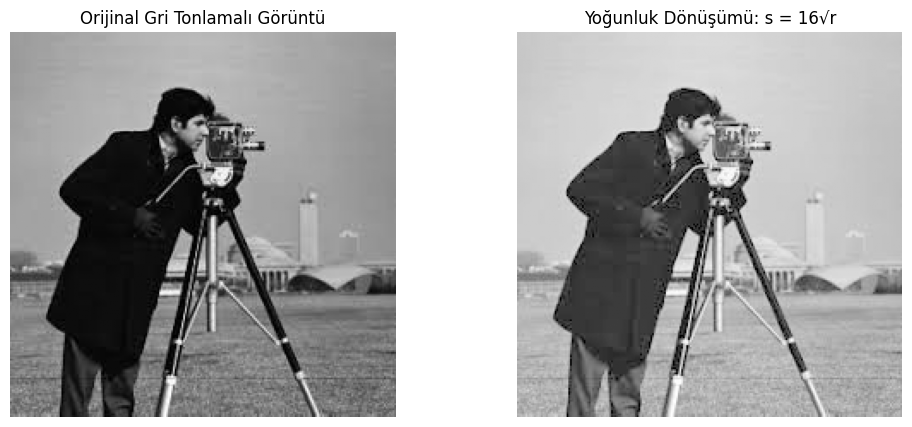

In [2]:
# Gerekli kütüphanelerin içe aktarılması
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 8-bit gri tonlamalı görüntünün okunması
image_path = "/content/drive/MyDrive/Colab Notebooks/islem/cameraman_test_image_grayscale.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntünün doğru okunup okunmadığının kontrolü
if image is None:
    raise ValueError("Görüntü yüklenemedi. Dosya yolunu kontrol ediniz.")

# 2. Yoğunluk dönüşümünün uygulanması
# r değerleri [0,255] aralığındadır
# s = 16 * sqrt(r)

# Görüntüyü float tipe çevirerek karekök işlemi uygulanır
image_float = image.astype(np.float32)

# Yoğunluk dönüşümü
transformed = 16 * np.sqrt(image_float)

# 3. Sonucun 0–255 aralığında kalmasının sağlanması
# Değerler sınırlandırılır ve tekrar uint8 formatına çevrilir
transformed_clipped = np.clip(transformed, 0, 255)
transformed_image = transformed_clipped.astype(np.uint8)

# 4. Sonuçların görselleştirilmesi
plt.figure(figsize=(12, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Gri Tonlamalı Görüntü")
plt.axis("off")

# Dönüştürülmüş görüntü
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Yoğunluk Dönüşümü: s = 16√r")
plt.axis("off")

plt.show()
